In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pima-indians-diabetes.data.csv')

print("Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head(), "\n")

# Assign proper column names (Pima dataset usually doesn’t include them)
df.columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]


Dataset loaded successfully!
Shape: (767, 9)
   6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0 



In [4]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    df[col] = df[col].replace(0, np.nan)

# Replace missing values with column median
df.fillna(df.median(), inplace=True)

print("Missing/invalid values handled.\n")

Missing/invalid values handled.



In [5]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

🔹 Gaussian Naive Bayes Results 🔹
Accuracy: 0.7316
F1-Score: 0.6076

Classification Report (GNB):
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       151
           1       0.62      0.60      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



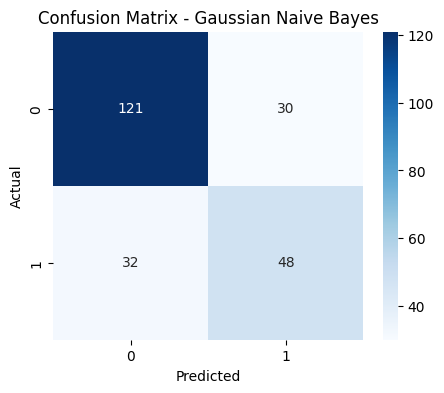

In [7]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

acc_gnb = accuracy_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)

print("🔹 Gaussian Naive Bayes Results 🔹")
print(f"Accuracy: {acc_gnb:.4f}")
print(f"F1-Score: {f1_gnb:.4f}")
print("\nClassification Report (GNB):")
print(classification_report(y_test, y_pred_gnb))

# Confusion Matrix for GaussianNB
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



🔹 Multinomial Naive Bayes Results 🔹
Accuracy: 0.7100
F1-Score: 0.5839

Classification Report (MNB):
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       151
           1       0.58      0.59      0.58        80

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



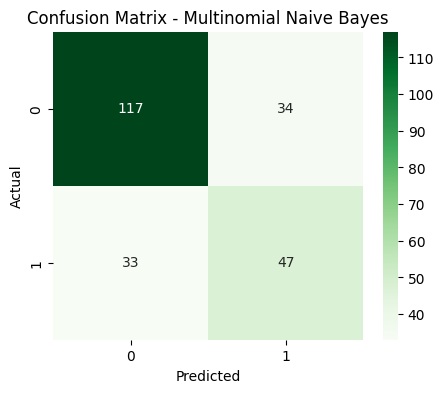

In [9]:
X_train_mnb = np.abs(X_train)
X_test_mnb = np.abs(X_test)

# Optional: scale features to make them non-negative integers
X_train_mnb = np.round(X_train_mnb)
X_test_mnb = np.round(X_test_mnb)

# Initialize and train MNB
mnb = MultinomialNB()
mnb.fit(X_train_mnb, y_train)
y_pred_mnb = mnb.predict(X_test_mnb)

# Evaluate performance
acc_mnb = accuracy_score(y_test, y_pred_mnb)
f1_mnb = f1_score(y_test, y_pred_mnb)

print("\n🔹 Multinomial Naive Bayes Results 🔹")
print(f"Accuracy: {acc_mnb:.4f}")
print(f"F1-Score: {f1_mnb:.4f}")
print("\nClassification Report (MNB):")
print(classification_report(y_test, y_pred_mnb))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Model Performance Summary:
           Model  Accuracy  F1-Score
0     GaussianNB  0.731602  0.607595
1  MultinomialNB  0.709957  0.583851


/tmp/ipython-input-1907722335.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')


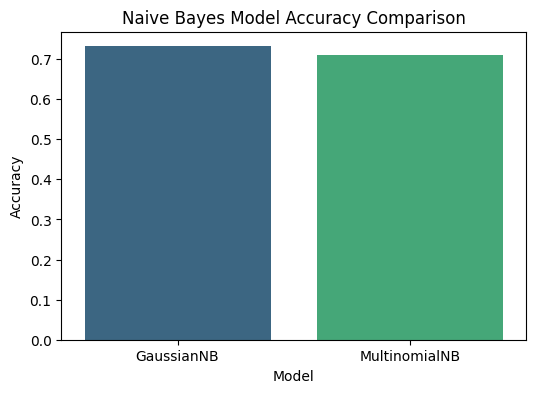

In [11]:
results = pd.DataFrame({
    'Model': ['GaussianNB', 'MultinomialNB'],
    'Accuracy': [acc_gnb, acc_mnb],
    'F1-Score': [f1_gnb, f1_mnb]
})

print("\nModel Performance Summary:")
print(results)

plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.title("Naive Bayes Model Accuracy Comparison")
plt.show()